In [1]:
!pip install GetOldTweets3

In [2]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegressionCV

%matplotlib inline

In [3]:
tweetCriteria = got.manager.TweetCriteria().setUsername("CAL_FIRE")\
                                           .setSince("2018-02-18")\
                                           .setUntil("2018-11-27")\
                                           .setMaxTweets(3000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)


tweets = []

for i in tweet:
    tweets.append(i.text)

In [4]:
tweetCriteria2 = got.manager.TweetCriteria().setUsername("CaltransHQ")\
                                           .setSince("2018-02-18")\
                                           .setUntil("2018-11-27")\
                                           .setMaxTweets(3000)
tweet2 = got.manager.TweetManager.getTweets(tweetCriteria2)

tweets2 = []

for i in tweet2:
    tweets2.append(i.text)

In [5]:
# tweetCriteria4 is just words: 'fire, closure and closures'

In [6]:
tweetCriteria4 = got.manager.TweetCriteria().setQuerySearch('fire closure closures')\
                                           .setSince("2018-02-18")\
                                           .setUntil("2018-11-28")\
                                           .setMaxTweets(3000)
tweet4 = got.manager.TweetManager.getTweets(tweetCriteria4)



tweets4 = []

for i in tweet4:
    tweets4.append(i.text)

In [7]:
tweets.extend(tweets2)

In [8]:
len(tweets)

3880

In [9]:
tweets.extend(tweets4)

In [10]:
len(tweets)

6880

In [11]:
tweets

['Ensure you are properly disposing of ashes created by your fireplace or wood burning stove. Place ashes in a bucket made of non-flammable material, and only store that bucket on concrete or bare mineral soil. A deck can catch fire from transferred heat. #FireplaceSafetypic.twitter.com/Cwm3kW0wYS',
 '#CampFire [final] Pulga Road at Camp Creek Road near Jarbo Gap (Butte County) is now 100% contained at 153,336 acres. Unified Command: @CALFIRE_ButteCo, @ButteSheriff, Paradise Police Department, and the USFS. http://www.fire.ca.gov/current_incidents/incidentdetails/Index/2277 …pic.twitter.com/TjMmiLrRQQ',
 '#CampFire [update] Pulga Road at Camp Creek Road near Jarbo Gap (Butte County) is now 153,336 acres and 98% contained. Unified Command: @CALFIRE_ButteCo, @ButteSheriff, Paradise Police Department, and the USFS. http://www.fire.ca.gov/current_incidents/incidentdetails/Index/2277 …pic.twitter.com/izWY2jM5Xd',
 '#CampFire [update] Some evacuation zones have been lifted.pic.twitter.com/8m

In [12]:
# this little function gives us some booleans
#cal2018_fire_tweets['tweet'].str.contains(('#Campfire'),case=False)


This is how you get everything into a single half-ass dataframe called a series

```camp_fire12 = camp_fire1.append(camp_fire2)```

```#camp_fire123 = camp_fire12.append(camp_fire3)```

```#camp_fire123.head()```

In [13]:
### YOU FOUND IT

cal2018_fire_rd_closure_tweets = pd.DataFrame(tweets)

cal2018_fire_rd_closure_tweets.columns = ['tweet']

cal2018_fire_rd_closure_tweets.to_csv('cal2018_fire_rd_closure_tweets.csv')

#This is agreat little thing Haya showed me on how to pick out certain words

#these lines will be in my first function to munge through the harvested tweets

```fire123['tweet'].str.contains(('camp fire'), case=False)```

```fire123['tweet'].str.contains(('#Campfire'), case=False)```

#then in the second function I will call this first funciton above to munge through the tweets
#that have 'closure(s)' in them.

```fire123['tweet'].str.contains(('closure'), case=False)```

In [14]:
fire123 = cal2018_fire_rd_closure_tweets

In [15]:
fire123.head()

,tweet
0,Ensure you are properly disposing of ashes cre...
1,#CampFire [final] Pulga Road at Camp Creek Roa...
2,#CampFire [update] Pulga Road at Camp Creek Ro...
3,#CampFire [update] Some evacuation zones have ...
4,#CampFire [update] Pulga Road at Camp Creek Ro...


In [16]:
fire123['closed'] = fire123['tweet'].str.contains('closed', case=False).astype(int)
fire123['closed'].head()

0    0
1    0
2    0
3    0
4    0
Name: closed, dtype: int64

In [17]:
fire123['closure'] = fire123['tweet'].str.contains('closure', case=False).astype(int)
fire123['closure'].head()

0    0
1    0
2    0
3    0
4    0
Name: closure, dtype: int64

In [18]:
fire123['closed/closure'] = fire123['closed'] | fire123['closure']

In [19]:
 fire123 = fire123.drop(columns='closure')

In [20]:
fire123 = fire123.drop(columns='closed')

In [21]:
#y = fire123['closed/closure']
#comeback and erase this after you have the bools to 1 and 0

In [22]:
#def campfire(fire123):
#    camp_fire = fire123['tweet'].str.contains(('closed', 'closure'), case=False)
#    return fire123.loc[camp_fire, :]

In [23]:
fire123.head()

,tweet,closed/closure
0,Ensure you are properly disposing of ashes cre...,0
1,#CampFire [final] Pulga Road at Camp Creek Roa...,0
2,#CampFire [update] Pulga Road at Camp Creek Ro...,0
3,#CampFire [update] Some evacuation zones have ...,0
4,#CampFire [update] Pulga Road at Camp Creek Ro...,0


In [24]:
fire123.to_csv('fire123_raw.csv')

In [25]:
fire123[6288:6295]

,tweet,closed/closure
6288,Line closure after fire in train - ICE wagon g...,1
6289,Fire closure lifted on Basalt Mountain but #Fo...,1
6290,10/15-16: Filming + Parking Restrictions/Stree...,1
6291,What do you feel about government cuts to the ...,1
6292,The closure of Basalt Mountain due to the #Lak...,1
6293,"Visitation to Glacier National Park increases,...",1
6294,"Visitation to Glacier National Park increases,...",1


In [26]:
cvec = CountVectorizer()

In [27]:
#text = ['fire', 'closure', 'closed' ]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = fire123['tweet']

In [30]:
y_fire123 = fire123['closed/closure']

In [31]:
#y_fire123 = fire123['closed'] + fire123['closure']

In [32]:
y = y_fire123

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33)

In [34]:
#fire123.drop(columns='fire', inplace=True)

In [35]:
cvec.fit(X_train) 

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
X_train_trans_cvec = cvec.transform(X_train)

In [37]:
X_train_trans_cvec

<4609x14075 sparse matrix of type '<class 'numpy.int64'>'
	with 132864 stored elements in Compressed Sparse Row format>

In [49]:
cvec.get_feature_names()

['00',
 '000',
 '001',
 '0045',
 '008',
 '00am',
 '00pm',
 '01',
 '011795punt',
 '0129gg8zgm',
 '013',
 '014',
 '015',
 '018',
 '019',
 '01am',
 '01amsanta',
 '02',
 '0200',
 '0289',
 '03',
 '037ztgujxt',
 '038',
 '03tazs94ol',
 '03u71sn3uj',
 '04',
 '041',
 '0412',
 '041318609term',
 '041318610term',
 '044',
 '0444',
 '045',
 '05',
 '050',
 '0500',
 '051',
 '055',
 '05blzejbll',
 '05reuters',
 '05v6yxt5rv',
 '06',
 '061uyz7w8g',
 '064',
 '069',
 '07',
 '070',
 '0700',
 '076',
 '07d5',
 '08',
 '081m6qylfn',
 '083',
 '087',
 '08lsuerwbw',
 '09',
 '098',
 '099',
 '0asqmkjzpkg',
 '0bamvn4hyw',
 '0bo68pdtlp',
 '0cgrxw5xrb',
 '0d9fc497afef4aec86ccb4d6a6068161',
 '0f4dfexrna',
 '0fkrbjvxjx',
 '0fw26pwugr',
 '0gk1tocplf',
 '0gqj7fkbnw',
 '0gqkg2nyuz',
 '0h4js48yq0',
 '0i2g7d8tzg',
 '0iiahfk0eo',
 '0iuehmcrln',
 '0laqwybgvk',
 '0lnnvjarcn',
 '0na094ywpt',
 '0nhoyu2wb3',
 '0o46mbc4oq',
 '0o6yqwqcna',
 '0olydtj5zi',
 '0ow57yts6u',
 '0rbskwekbd',
 '0rnlslkimo',
 '0s',
 '0svjsm8uss',
 '0tgqbxux19'

In [50]:
X_test_trans_cvec = cvec.transform(X_test)

In [62]:
lgr = LogisticRegressionCV(cv=5)

In [64]:
model = lgr.fit(X_train_trans_cvec, y_train)

In [65]:
model.score(X_train_trans_cvec, y_train)
#score(X_train_trans_cvec, y_train)

1.0

In [67]:
lgr.fit(X_test_trans_cvec, y_test)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [72]:
lgr.score(X_test_trans_cvec, y_test)

1.0

In [73]:
preds = lgr.predict(X_test_trans_cvec)

In [74]:
preds

array([0, 1, 0, ..., 1, 0, 1])

(array([1164.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

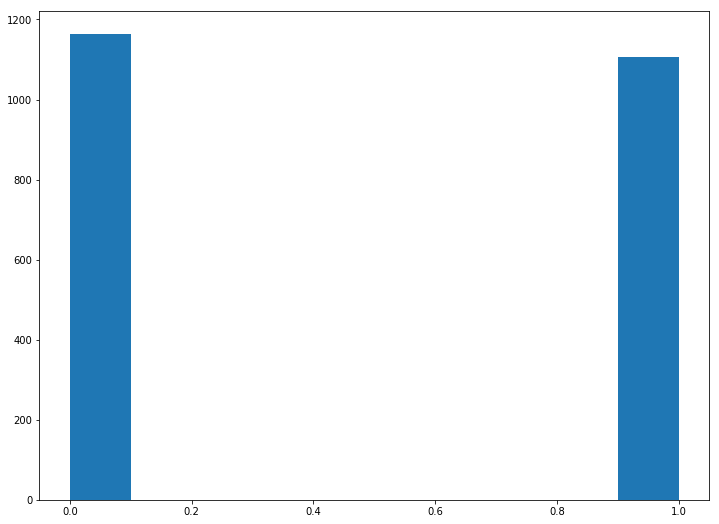

In [75]:
plt.figure(figsize = (12,9))
plt.hist(preds)

###COUNT VEctorize or tfidf or and then apply that to a linear model, again, Haya's suggestion#####

In [ ]:
#campfire_lst = []

#for i in df_campfire:
#    if i in text == True:
#        campfire_lst.extend(i)
#    else:
#        continue
#    print(campfire_lst)

In [ ]:
#X_train_df = pd.DataFrame(X_train)

#X_train_df = pd.DataFrame(X_train.toarray(), columns=cvec.get_feature_names())

#X_train_df.head()



#X#_test = cvec.transform()
#X_test_df = pd.DataFrame(X_test.toarray(), columns=cvec.get_feature_names())
#X_test_df.head()

#cvec.transform(X_test)

In [ ]:
#for i in range(len(X_test_df)):
#    if i != 0:
#        print(X_test_df.loc[i])

In [ ]:
#def boolswitch(y_fire123):
#    for x in y_fire123:
#        if x == True:
#            print(1)
#        else:
#            print(0)
#Don't run this function again or it will fuck you up


#def unsundzeros(y):
#    for i in y:
#        if i >= 1
#             print(1)
#        else:
#            print(0)